In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("OnlineRetail.csv",
                 encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [50]:
df.shape

(541909, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [52]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [53]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [54]:
df[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom


In [55]:
df[df["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [56]:
#qty > 0, unitprice > 0, uk 

In [57]:
pos_qty = df[df["Quantity"] > 0] 
pos_uprice = pos_qty[pos_qty["UnitPrice"] > 0] 
new_df = pos_uprice[pos_uprice["Country"] ==  "United Kingdom"] 
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [58]:
df_1 = df[(df["Country"] == "United Kingdom") & (df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df_1.shape

(485123, 8)

In [59]:
new_df.shape

(485123, 8)

In [60]:
new_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
dtype: int64

In [61]:
new_df.dropna(inplace=True)
new_df.shape

(354321, 8)

In [62]:
# RFM - Analysis
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [63]:
# Recency 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354321 non-null  object 
 1   StockCode    354321 non-null  object 
 2   Description  354321 non-null  object 
 3   Quantity     354321 non-null  int64  
 4   InvoiceDate  354321 non-null  object 
 5   UnitPrice    354321 non-null  float64
 6   CustomerID   354321 non-null  float64
 7   Country      354321 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [64]:
new_df["InvoiceDate"] = pd.to_datetime(new_df["InvoiceDate"])
new_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [65]:
m_date = new_df["InvoiceDate"].max()
m_date

Timestamp('2011-12-10 17:19:00')

In [66]:
m_date = new_df["InvoiceDate"].max()

new_df["D_Diff"] = m_date - new_df["InvoiceDate"]
new_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,D_Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697 days 08:53:00


In [67]:
new_df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,D_Diff
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113.0,United Kingdom,89 days 04:30:00
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-09-12 12:49:00,7.08,13113.0,United Kingdom,89 days 04:30:00


In [68]:
recency = new_df.groupby("CustomerID",as_index=False)[["D_Diff"]].min()
recency.rename(columns = {"D_Diff" : "Recency"},inplace=True)
recency["Recency"] = recency["Recency"].dt.days
recency.head()

,CustomerID,Recency
0,12346.0,326
1,12747.0,23
2,12748.0,4
3,12749.0,23
4,12820.0,45


In [69]:
# frequency
freq = new_df.groupby("CustomerID",as_index=False)["InvoiceDate"].count()
freq.rename(columns = {"InvoiceDate" : "Frequency"},inplace=True)
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4595
3,12749.0,199
4,12820.0,59


In [70]:
rf = pd.merge(left = recency, right = freq, on="CustomerID",how="inner")
rf.head(2)

,CustomerID,Recency,Frequency
0,12346.0,326,1
1,12747.0,23,103


In [71]:
# total_amount
new_df["Total_Amount"] =  new_df["Quantity"] * new_df["UnitPrice"]
new_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,D_Diff,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,697 days 08:53:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697 days 08:53:00,20.34


In [72]:
monetary = new_df.groupby("CustomerID",as_index=False)["Total_Amount"].sum()
monetary.head(2)

,CustomerID,Total_Amount
0,12346.0,77183.60
1,12747.0,4196.01


In [73]:
monetary.rename(columns = {"Total_Amount" : "Monetary"},inplace=True)
monetary.head(2)

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01


In [74]:
rfm = pd.merge(left = rf, right = monetary, on = "CustomerID", how="inner")
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,23,103,4196.01
2,12748.0,4,4595,33719.73
3,12749.0,23,199,4090.88
4,12820.0,45,59,942.34


In [75]:
sorted_rfm = rfm.sort_values(by = ["Recency", "Frequency", "Monetary"],
               ascending = [True, False, False])
sorted_rfm

,CustomerID,Recency,Frequency,Monetary
3593,17841.0,0,7847,40991.57
1771,15311.0,0,2379,60767.90
1950,15555.0,0,899,4805.17
2453,16241.0,0,662,2607.87
3236,17346.0,0,500,2676.56
...,...,...,...,...
1004,14237.0,697,9,161.00
2307,16048.0,697,8,256.44
3452,17643.0,697,8,101.55
1800,15350.0,697,5,115.65


In [76]:
sorted_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.00000,3920.000000,3920.000000
mean,15562.059694,105.59949,90.388010,1864.385601
std,1576.594671,115.04432,217.808385,7482.817477
min,12346.000000,0.00000,1.000000,3.750000
25%,14208.750000,22.00000,17.000000,300.280000
50%,15569.500000,61.00000,41.000000,652.280000
75%,16913.250000,162.00000,99.250000,1576.585000
max,18287.000000,697.00000,7847.000000,259657.300000


In [77]:
import plotly.express as px

In [78]:
fig = px.scatter_3d(rfm, x = "Monetary", y = "Frequency", z = "Recency")
fig.show()

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [80]:
# scale 
# kmean
# inertia

In [81]:
sc = StandardScaler()
scaled_rfm = sc.fit_transform(rfm[["Recency","Frequency", "Monetary"]])
scaled_rfm

array([[ 1.91603226e+00, -4.10449826e-01,  1.00669064e+01],
       [-7.18071328e-01,  5.79114471e-02,  3.11636875e-01],
       [-8.83246140e-01,  2.06841746e+01,  4.25767546e+00],
       ...,
       [ 9.59757030e-01, -3.59940277e-01, -2.25389800e-01],
       [-8.31085673e-01,  3.05634195e+00,  3.08070865e-02],
       [-9.18019785e-01, -9.36172002e-02, -3.62284108e-03]])

In [82]:
model = KMeans(n_clusters = 3, random_state = 0 )
model

KMeans(n_clusters=3, random_state=0)

In [83]:
model.fit(scaled_rfm)

KMeans(n_clusters=3, random_state=0)

In [84]:
model.labels_

array([0, 2, 0, ..., 1, 2, 2])

In [85]:
#wcss

In [86]:
wcss = []
for i in range(2,9):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(scaled_rfm)
    wcss.append(model.inertia_)

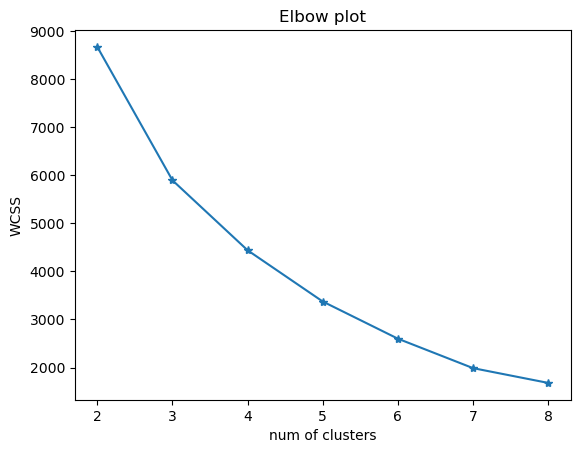

In [87]:
plt.plot(range(2,9), wcss, marker="*")
plt.title("Elbow plot")
plt.xlabel("num of clusters")
plt.ylabel("WCSS")
plt.show()

In [88]:
model = KMeans(n_clusters=4,random_state=0)
model.fit(scaled_rfm)
model.labels_

array([1, 2, 3, ..., 0, 2, 2])

In [89]:
model.cluster_centers_

array([[ 1.35721484e+00, -2.76435218e-01, -1.86831450e-01],
       [-5.56953441e-01,  2.59961318e+00,  1.21769047e+01],
       [-4.99084087e-01,  6.08677968e-02, -1.22732166e-03],
       [-8.71654925e-01,  2.64514467e+01,  5.98259790e+00]])

In [90]:
rfm["Cluster_id"] = model.labels_
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_id
0,12346.0,326,1,77183.60,1
1,12747.0,23,103,4196.01,2
2,12748.0,4,4595,33719.73,3
3,12749.0,23,199,4090.88,2
4,12820.0,45,59,942.34,2


In [91]:
fig = px.scatter_3d(rfm, x = "Monetary", y = "Frequency", z = "Recency",
                   color = "Cluster_id")
fig.show()

In [92]:
rfm["Recency"].mean(), rfm["Recency"].std()

(105.59948979591837, 115.0443197589435)

In [93]:
#x = z*sigma + xbar
(0.01 * rfm["Recency"].std()) + rfm["Recency"].mean()

106.74993299350781

In [94]:
rfm["Recency"]

0       326
1        23
2         4
3        23
4        45
       ... 
3915    160
3916      4
3917    216
3918     10
3919      0
Name: Recency, Length: 3920, dtype: int64

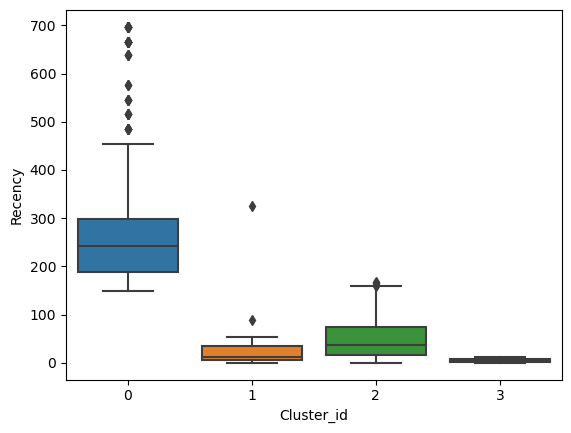

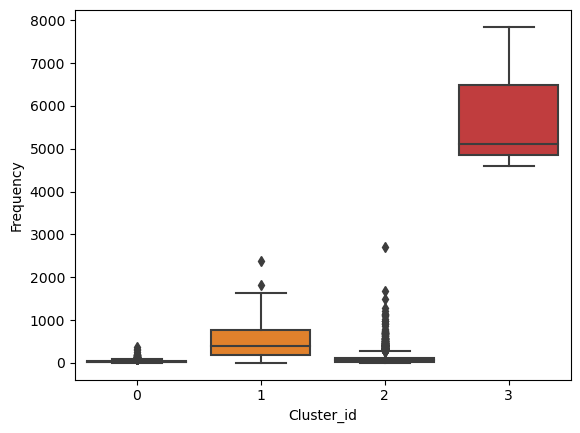

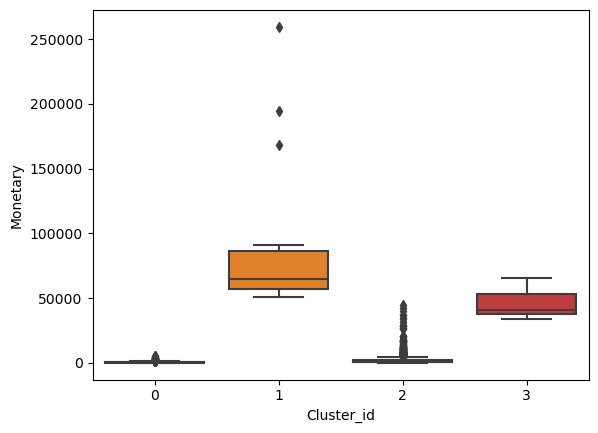

In [95]:

for i in ["Recency", "Frequency","Monetary"]:
    sns.boxplot(data=rfm, x = "Cluster_id", y = i)
    plt.show()